<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Data_and_shapefile_join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all necessary pacakages

In [2]:
!pip install geopandas
!pip install contextily

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 51.0 MB/s 
     |████████████████████████████████| 16.7 MB 33.7 MB/s 
     |████████████████████████████████| 19.3 MB 1.8 MB/s 


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx

Read the data file as a csv in pandas. Upload 'CA_census_tracts.csv' to google colab and then read it.

In [4]:
data = pd.read_csv("CA_census_tracts.csv")

Explore the top 3 rows of your dataset

In [5]:
data.head(3)

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
0,6001437701,3745.0,29.4,59.6,11.7,9.9,303.0,49.7,19.2,310700.0,...,64.3,11.9,15.7,93.8,11.5,35.5,38.6,6,1,Alameda
1,6001437102,4586.0,36.6,34.2,10.1,8.5,1813.0,45.8,28.0,384400.0,...,78.1,10.4,45.5,91.2,22.0,32.9,48.8,6,1,Alameda
2,6001437101,7186.0,40.2,20.6,13.9,5.9,3623.0,49.4,76.1,582400.0,...,75.6,3.1,34.5,90.0,40.0,46.1,42.3,6,1,Alameda


Explore the data types of each column

In [6]:
data.dtypes

GEOID10                          int64
total_pop                      float64
median_age                     float64
pct_hispanic                   float64
pct_white                      float64
pct_black                      float64
pct_asian                      float64
pct_male                       float64
pct_single_family_home         float64
med_home_value                 float64
med_rooms_per_home             float64
pct_built_before_1940          float64
pct_renting                    float64
rental_vacancy_rate            float64
avg_renter_household_size      float64
med_gross_rent                 float64
med_household_income           float64
mean_commute_time              float64
pct_commute_drive_alone        float64
pct_below_poverty              float64
pct_college_grad_student       float64
pct_same_residence_year_ago    float64
pct_bachelors_degree           float64
pct_english_only               float64
pct_foreign_born               float64
state                    

You will find the 'tl_2017_06_tract.zip' folder in Canvas - Week5 Module. Download and unzip the folder. Upload its contents to the Google colab notebook.
Then read the 'tl_2017_06_tract.shp' file using geopandas.

In [9]:
tracts = gpd.read_file("tl_2017_06_tract.shp")

Explore the top 3 rows and see how the geometry column looks like. Each census tract should have a unique GEOID and a POLYGON geometry associated with it.
There can also be additional attributes like name of the census tract, state and county ID's within which the census tract falls.

In [10]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.00230 37.52984, -122.00224 37.5..."
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21963 34.02629, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."


Check the data types of the columns

In [11]:
tracts.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

If you look closely, you will find both the 'data' and 'tracts' dataframes have a common column 'GEOID'. But in the 'tracts' dataframe it is a string but the 'data' dataframe it is an integer.
Also, the name of the column in both dataframes do not match for 'tracts' the column name is 'GEOID' but for 'data' it is 'GEOID10'. So we have to make some adjustments before we join these two dataframes together.

1. We must change the 'GEOID' column from 'tracts' dataframe to an integer so that it matches with our 'data' dataframe.

In [14]:
#Convert the GEOID to an integer
#pd.numeric() function converts any data type to an integer fromat
#We create a new column with the same name as the one in 'data' dataframe and store the integer GEOIds there
tracts['GEOID10'] = pd.to_numeric(tracts.GEOID)

In [15]:
#Now check if the data type has changed
tracts.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
GEOID10        int64
dtype: object

Now let us join the two dataframes 'data' and 'tracts' using the merge() function. The join will be done using the common column 'GEOID10' which is an integer and available in both dataframes.

In [18]:
#The typical format for an attribute join is <First DataFrame>.merge(<Second DataFrame>, on = <Common column_name in both DataFrames>)
#We merge the 2 dataframes together and create a new dataframe 'merged_data' after joining them
merged_data = tracts.merge(data, on = 'GEOID10')

Explore the top 3 rows of the merged dataset

In [19]:
#The merged_data will have all the columns from 'data' and 'tracts' dataframes in it
#Check merged_data.head(3)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,...,73.7,1.7,31.8,89.3,49.4,60.3,28.8,6,1,Alameda
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,...,70.1,8.0,38.7,88.7,38.7,50.7,39.5,6,1,Alameda
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,...,86.4,28.3,19.0,91.7,8.7,14.0,39.9,6,37,Los Angeles


In [20]:
#Check all the columns in the joined dataframe
merged_data.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'GEOID10', 'total_pop', 'median_age', 'pct_hispanic', 'pct_white',
       'pct_black', 'pct_asian', 'pct_male', 'pct_single_family_home',
       'med_home_value', 'med_rooms_per_home', 'pct_built_before_1940',
       'pct_renting', 'rental_vacancy_rate', 'avg_renter_household_size',
       'med_gross_rent', 'med_household_income', 'mean_commute_time',
       'pct_commute_drive_alone', 'pct_below_poverty',
       'pct_college_grad_student', 'pct_same_residence_year_ago',
       'pct_bachelors_degree', 'pct_english_only', 'pct_foreign_born', 'state',
       'county', 'county_name'],
      dtype='object')

Now, let us try to plot one variable from the 'merged_data' using a continuous color scheme - also called a choropleth map. 

* We try mapping the percentage of population below poverty level for all counties using the column 'pct_below_poverty'.

* Let us choose a colormap with light to dark Red color scheme using cmap="Reds". 

* We can also set the legends using legends=True.

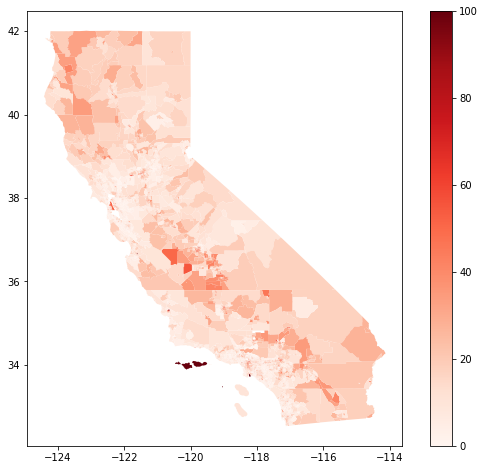

In [21]:
merged_data.plot("pct_below_poverty", cmap="Reds", figsize = (10,8),legend=True )

in a similar way, let us try to plot the percentage of population with college education using the column 'pct_foreign_born' and choose a different color scheme with cmap = "Blues

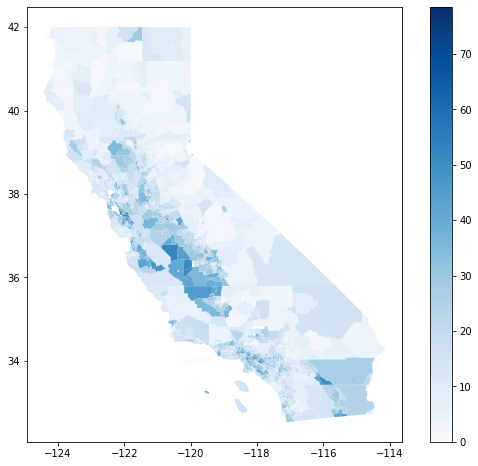

In [22]:
merged_data.plot("pct_foreign_born", cmap="Blues", figsize = (10,8), legend = True )

Say we want to add a basemap to our plots - we can store the plot in a variable called 'ax' and then use the function 'add_basemap()' from the contextily library we can add any basemap of our choice. But first we have to set the correct map projection using the to_crs() function.

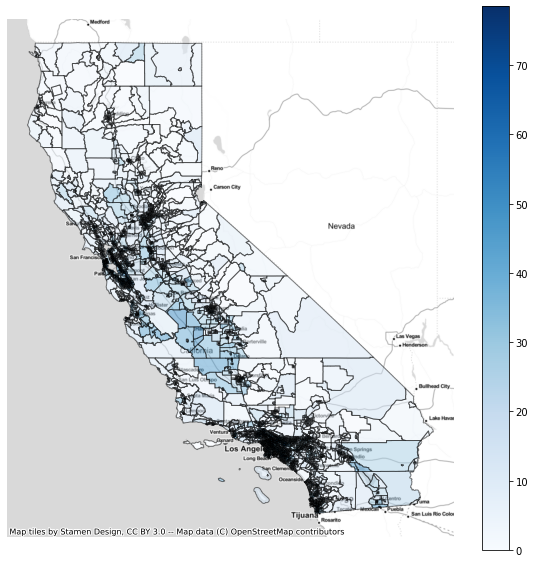

In [26]:
#Set map projection to WGS84 using the epsg code 3857
merged_data = merged_data.to_crs(epsg=3857)

#Store the plot in a variable 'ax'
ax = merged_data.plot("pct_foreign_born",figsize=(10, 10), alpha=0.5, edgecolor='k', cmap = "Blues", legend = True)

#Choose and add a basemap from contextily package
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

#Turn off the axis labels
ax.set_axis_off()

#Save your map as an image file
plt.savefig('Foreign_born_percentage_CA_census_tracts.png', dpi = 600)

Let us filter our merged_data dataframe and only select the 'Orange County' area.

In [32]:
orange_county = merged_data.loc[merged_data['county_name']=='Orange']
orange_county.head(3)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
328,06,059,990100,06059990100,9901,Census Tract 9901,G5020,S,0,352603583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,59,Orange
329,06,059,062649,06059062649,626.49,Census Tract 626.49,G5020,S,3369929,8846,...,79.6,13.5,62.5,84.0,53.0,74.0,28.5,6,59,Orange
330,06,059,032058,06059032058,320.58,Census Tract 320.58,G5020,S,5975932,0,...,76.3,1.2,11.7,82.5,68.4,76.5,14.5,6,59,Orange


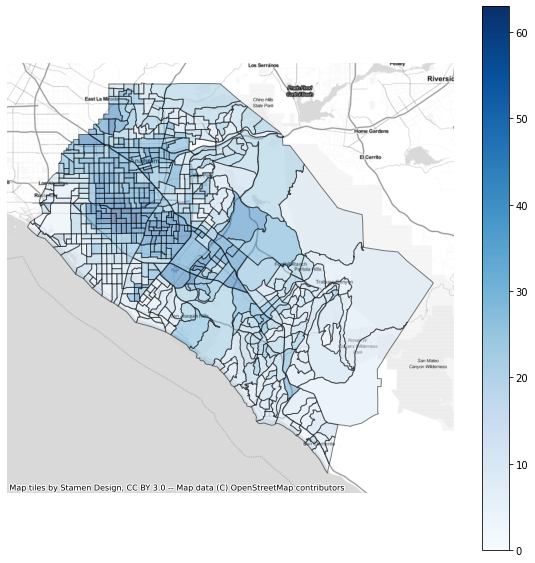

In [33]:
#Store the plot in a variable 'ax'
ax = orange_county.plot("pct_foreign_born",figsize=(10, 10), alpha=0.5, edgecolor='k', cmap = "Blues", legend = True)

#Choose and add a basemap from contextily package
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

#Turn off the axis labels
ax.set_axis_off()

#Save your map as an image file
plt.savefig('Foreign_born_percentage_OrangeCounty_census_tracts.png', dpi = 600)

Try the same way to plot the census tracts for 'Los Angeles' county

Now, try to plot a different column 'mean_commute_time' for both Orange County and Los Angeles county